LOADING YOLO
YOLO LOADED
Input Image:


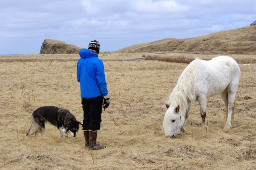

Detected object: horse, confidence: 0.9975360631942749, box: 159,53, 84, 83
Detected object: dog, confidence: 0.9832477569580078, box: 24,104, 58, 35
Detected object: person, confidence: 0.9999039173126221, box: 76,36, 33, 113


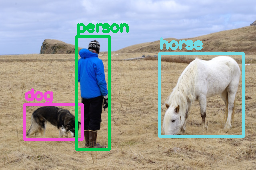

-1

In [ ]:
# -*- coding: utf-8 -*-
"""YOLO.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1TFW5GN9JUwyddfQmP3TjC9uO22kpFrDY
"""

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load Yolo
print("LOADING YOLO")
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")
classes = []
with open("/content/coco.names", "r") as f:
  classes = [line.strip() for line in f.readlines()]
  # Get layers of the network
layer_names = net.getLayerNames()
# Determine the output layer names from the YOLO model
output_layers = [layer_names[i - 1] for i in
net.getUnconnectedOutLayers()]
print("YOLO LOADED")
# Capture frame-by-frame
img = cv2.imread("person.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
print("Input Image:")
cv2_imshow(img)
# Using blob function of opencv to preprocess image
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)
# Detecting objects
net.setInput(blob)
outs = net.forward(output_layers)
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.01:
# Object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)
# Rectangle coordinates
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
      # We use NMS function in opencv to perform Non-maximum Suppression
# we give it score threshold and nms threshold as arguments.
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[class_ids[i]]
# Draw the bounding box
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
# Draw the label
    cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1/2, color, 2)
    print(f"Detected object: {label}, confidence: {confidences[i]}, box: {x},{y}, {w}, {h}")
    # Display the image
cv2_imshow(img)
cv2.waitKey(0)